In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing




In [2]:
df = pd.read_csv(r'D:\batch -3\Machine learning project\Project 28 Thyroid Disease\Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.shape

(383, 17)

In [4]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

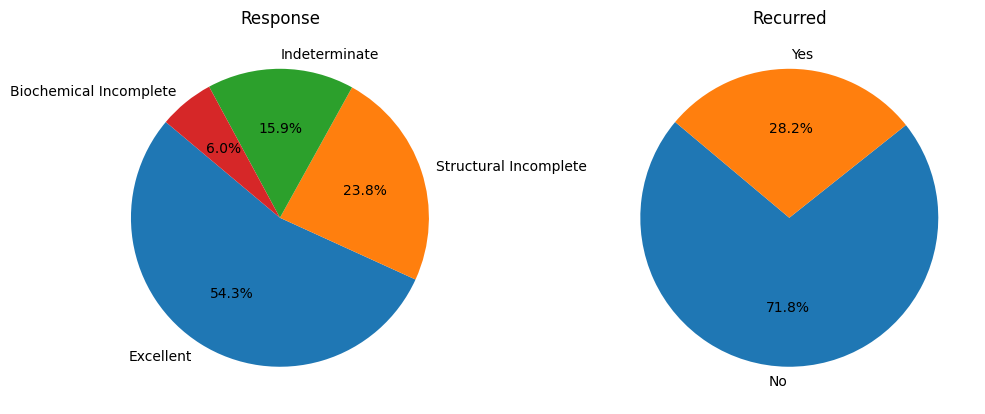

In [8]:
plt.figure(figsize=(10, 5))

# Pie chart for Response
plt.subplot(1, 2, 1)
response_counts = df['Response'].value_counts()
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Response')

# Pie chart for Recurred
plt.subplot(1, 2, 2)
recurred_counts = df['Recurred'].value_counts()
plt.pie(recurred_counts, labels=recurred_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Recurred')

plt.tight_layout()
plt.show()

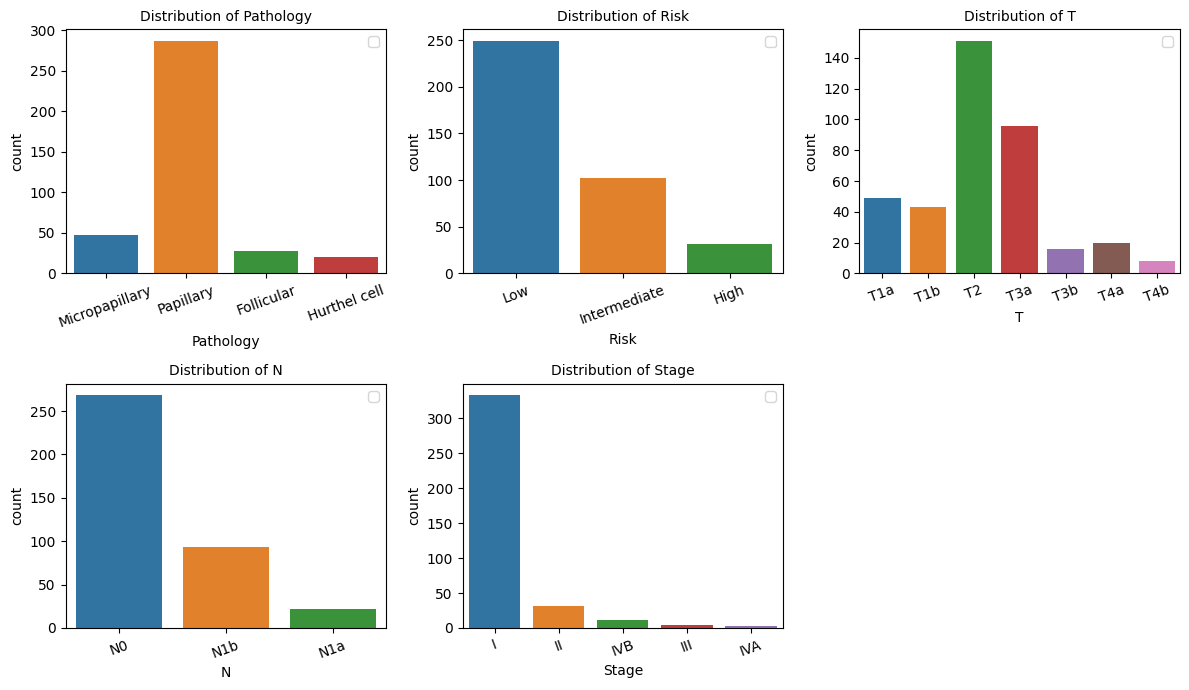

In [9]:
# distribution of categorical variables
plt.figure(figsize = (12,7))
columns_to_plot = ['Pathology', 'Risk', 'T', 'N', 'Stage']
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = df[col], hue = df[col], dodge=False)
    plt.title(f'Distribution of {col}', fontsize = 10)
    plt.legend([])
    plt.xticks(rotation = 20)

plt.tight_layout()
plt.show()

In [10]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
categorical = df.select_dtypes(include = "object")
for column in categorical.columns:
  df[column] = encoder.fit_transform(df[column])

In [12]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [13]:
x = df.drop(columns = 'Recurred')
y = df['Recurred']

In [14]:
print(x)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0     27       0        0           0                0                 2   
1     34       0        0           1                0                 2   
2     30       0        0           0                0                 2   
3     62       0        0           0                0                 2   
4     62       0        0           0                0                 2   
..   ...     ...      ...         ...              ...               ...   
378   72       1        1           1                1                 2   
379   81       1        1           0                1                 2   
380   72       1        1           1                0                 2   
381   61       1        1           1                1                 0   
382   67       1        1           0                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0         

In [15]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int32


In [16]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [18]:
model = svm.SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [19]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.948051948051948


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.8701298701298701


In [21]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 0.935064935064935


In [22]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
print("Random Forest Accuracy:", accuracy_score( rf_pred,ytest))

Random Forest Accuracy: 0.948051948051948


In [23]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))

XGBoost Accuracy: 0.948051948051948


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.948051948051948


In [25]:
from sklearn.linear_model import LogisticRegression
logs = LogisticRegression()
logs.fit(xtrain,ytrain)
y_pre = logs.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8961038961038961

In [26]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.922077922077922


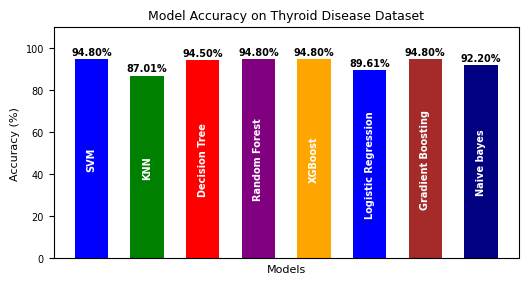

In [1]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [94.80, 87.01, 94.50, 94.80, 94.80, 89.61, 94.80,92.20]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'blue', 'brown','navy'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on Thyroid Disease Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()